# **Questions**

**Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?**

> * Regression problems are solved using linear regression, while classification problems are solved using logistic regression.
* Linear regression provides a continuous output but Logistic regression provides discreet output.
* Linear regression's goal is to determine the best-fitting line, but logistic regression goes one step farther and fits the line values to the sigmoid curve.
* The method for calculating loss function in linear regression is the mean squared error whereas for logistic regression it is maximum likelihood estimation.
* When new data points are added, the threshold value shifts in linear regression.

**What's a decision tree and how it is different to a logistic regression model?**
> * **What's a decision tree?** 
 * For categorization and prediction, the decision tree is the most powerful and widely used technique. A decision tree is a flowchart-like tree structure in which each internal node represents an attribute test, each branch reflects the test's result, and each leaf node (terminal node) stores a class label.
* **how it is different to a logistic regression model?**
 * The Decision Tree is easier to understand. However, Logistic Regression is more difficult to interpret.
 * The Decision Tree's Decision Boundaries are The space is divided into smaller areas by bisection. However, Logistic Regression Decision Boundaries are Linear and have only one decision boundary.
 * The Decision Tree's Decision Making Ease is Decision-making is handled automatically. However, Logistic Regression Decision Making Ease is A decision threshold must be established.
 * Decision Tree is Prone to overfitting. but Logistic Regression isn't prone to overfitting.
 * Noise has a significant impact on the Decision Tree's robustness to noise. However, Logistic Regression's robustness to noise is robust.
 * Decision Tree Scalability It's possible to train it on a modest training set. Scalability of Logistic Regression, on the other hand, necessitates a large enough training set.


**What's the difference between grid search and random search?**
 > * We no longer give a clear set of possible values for each hyperparameter in random search, unlike grid search. To execute a randomised search, we establish a sampling distribution for each hyperparameter, but grid search estimates the performance for each combination.
* Using random search, we can also control or limit the number of hyperparameter combinations used *(we can specify to train only a fixed number of models and terminate the tuning algorithm post that)*. Unlike grid search, in which every possible combination is evaluated


\

> *  Grid search
   * Try out every combination of the parameters
   * Computationally expensive
   * Global optimal (within the given range)
   * Sklearn: model_selection.GridSearchCV
* Random search
 * Try out a random subset 
 * `good enough`
 * Local optimal (within the given range)
 * Efficient (less trials)
 * Sklearn: model_selection.RandomizedSearchCV






**What's the difference between bayesian search and random search?**
> * Random search
  * Try out a random subset 
  * good enough
  * Local optimal (within the given range)
  * random search are completely uninformed by past evaluations.
  * Efficient (less trials)
  * Sklearn: model_selection.RandomizedSearchCV
* Bayesian Optimization
 * As an optimization problem
 * it use to pick the next set of hyperparameters which will improve the model performance. We iteratively repeat this process until we converge to an optimum.(Trial -> estimated error -> Bayesian model estimates the next 
parameter to try -> trial -> repeat..)
 *  Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than random search.
 * pip install bayesian-optimization

# **Problem Formulation**

## Define the problem

* This notebook will look into if dating preferences, attribute ratings, and background information can be used to forecast whether a partner will match with their date.
* The problem can be framed as a supervised, binary classification problem where the model predicts if a partner has accepted or rejected their date.
* The dataset is highly unbalanced.

## What is the input?

All Dataset without the match columns (191 number of input features). 
  
**The Dataset**:
* Participants attended a dating event where they had a 4-minute date with every other participant of the opposite sex who attended the same event.
* The participants decided to accept or reject their partner. If both the participant and partner matched, they received each other's contact information.
* Participants rated their partners on six personal attributes: attractiveness, sincerity, intelligence, fun, ambition and shared interests.
* Before and after the event, participants rated their preferences in the six attributes and gave themselves ratings.
* Other information was collected about the participants' background and preferences. 

## What is the output?

The participants decided to accept or reject their partner. If both the participant and partner matched.
In the dataset, the match column is output.

## What data mining function is required?

In this case, it will be binary Classification that separates data points into different classes (accept or reject / 1 or 0) which If both the participant and partner matched.

## What could be the challenges?

* the datasets have multiplue missing values.
* the datasets are highly unbalanced.
* predict the match betweem the participant and partner is correct. 

## What is the impact?

When I create a new system and give it some Features, it can decide whether or not people are compatible with one another. without these individuals coming together.

## What is an ideal solution?

According to my subsequent attempts, Bayesian Search and XGBoost Classifier with Cross Validation is the best approach because it provides me the highest kaggle score.

     In Kaggle 
        * Public score: 0.88872
        * Private score: 0.89038



XGBoost Classifier is designed to be highly efficient, flexible and portable.


The Bayesian Search use of intelligence to pick the next set of hyperparameters which will improve the model performance.

## What is the experimental protocol used and how was it carried out?

* Read the data using the function "read_csv"
* Cleaning the dataset by I'll check for null values, duplicated values, drop some features and handle them. 
* The data is unbalanced, so i will use StandardScaler to making data points generalized so that the distance between them will be lower.
* I will split the data to use Holdout method is split the training dataset to training data and validation data using "train_test_split".
* convert the categorical values to numerical values using "OneHotEncoder".
* I use Cross validation for training the model well.
* Determine the optimal values for a given model by using GridSearch, RandomSearch and BayesianSearch.
* I use Xgboost, logistic regression and svm to fit the model.  


## What preprocessing steps are used?

* Missing value imputation.
* Dropping some of features.
* Transform the data.
* Feature selction.
* Standard Scaler (to handle the unbalanced data).
* Encoder the Features.

# **Implementation**

##  **Importation libraries**

I will install a package and import several libraries.

NumPy I can be used to perform a wide variety of mathematical operations on arrays.

Pandas is a Python library for data analysis.

Matplotlib is a python library used for Data Visualization.

Sklearn provides a selection of efficient tools for machine learning and statistical modeling .

In [ ]:
!pip install scikit-optimize

In [ ]:
# For uploading and accessing the data
import numpy as np
import pandas as pd

# for Data Visualization
import matplotlib.pyplot as plt

# # for making statistical graphics.
import seaborn as sns

# for Encode categorical features as a numeric values
from sklearn.preprocessing import OneHotEncoder

# for scaling the data
from sklearn.preprocessing import StandardScaler

# for split data
from sklearn.model_selection import train_test_split

# for selecting column by data types
from sklearn.compose import ColumnTransformer

# for assemble several steps that can be cross-validated together while setting different hyperparameters
from sklearn.pipeline import Pipeline

# for completing missing values.
from sklearn.impute import SimpleImputer


# SelectKBest use for Select features according to the k highest scores. mutual_info_classif utilize the mutual information.
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# import XGBoost Classifier
from xgboost import XGBClassifier

# import SVC Classifier
from sklearn.svm import SVC
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# import Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression


# select the best parameters from the listed hyperparameters.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV


# Provides train/test indices to split data into train/test sets
from sklearn.model_selection import PredefinedSplit



# import warnings to prevent show warnings
import warnings
warnings.filterwarnings("ignore")

## **Read Data**

I Will connect to the drive and load and read train and test files from there. 

I'll use the read csv function to read the data. It may read any delimited text file and change the delimiter by using the sep option.

I'm going to read the training and testing datasets.

In [ ]:
# Connect to my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading the training dataset 
df_train = pd.read_csv('/content/drive/MyDrive/Data Mining/Compition 2/train.csv') 
# df_train = pd.read_csv('train.csv') 
# reading the testing dataset 
df_test = pd.read_csv('/content/drive/MyDrive/Data Mining/Compition 2/test.csv') 
# df_test = pd.read_csv('test.csv')

In [ ]:
#show heading of columns in trainig data
df_train.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#show heading of columns in testing data
df_test.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052


In [ ]:
# show the training data shape
print('Shape to traing : ', df_train.shape)
# show the testing data shape
print('Shape to testing : ', df_test.shape)

Shape to traing :  (5909, 192)
Shape to testing :  (2469, 191)


## **Functions**

I'll do functions because I'll be using them a lot and don't want to repeat the code. such as plot the data, create pipline and set multiple classifiers and fit them, predict the testing set and record the probability of prediction in csv file.

In [ ]:
# Make Funiction for display data to can anyone understand the data 
def plot_distribution(data, bins, title, xlabel, ylabel):
  # plots a univariate distribution of observations.
  ax = sns.distplot(
      data,
      bins=bins,
      hist_kws={
          "linewidth": 1,
          'edgecolor': 'black',
          'alpha': 1.0
          },
      kde=False
  )
  # set the title name to the plot
  ax.set_title(title)
  # set the label to x in the plot
  ax.set_xlabel(xlabel)
  # set the label to y in the plot
  ax.set_ylabel(ylabel);

In [ ]:
# Make a Function to Pipeline preprocessor, selector and my_classifier
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters

def create_fit_pipeline(my_classifier):
  full_pipeline = Pipeline(
      steps=[
          ('preprocessor', preprocessor),
          ('selector', SelectKBest(mutual_info_classif, k=5)),
          ('my_classifier', my_classifier)
      ]
  )
  # The pipeline object can be used like any sk-learn model and training it 
  full_pipeline = full_pipeline.fit(x_train, y_train)
  return full_pipeline

In [ ]:
# Make Funiction to prediction the pipeline
def predict_pipeline(full_pipeline):
  # prediction the df_test
  y_pred = full_pipeline.predict(df_test)
  # Show unique and count values
  return pd.DataFrame(y_pred).value_counts()

In [ ]:
# Make a Function for predict the testing data and save it in the csv file
def predict_save_csv(search_model, classifier_name):
  submission = pd.DataFrame()
  submission['id'] = df_test.index
  submission['match'] = search_model.predict_proba(df_test)[:,1]
  file_name = 'sample_submission_walkthrough_' + classifier_name + '.csv'
  submission.to_csv(file_name, index=False)

## **Quick look at the data**

To begin, I displayed the information from the training and testing data, changed the id to the index, dropped several features from the training and testing sets, and changed the data type of object in features to category. Change the data type of the object in features to float and replace the values in the income feature. check the null values, check the duplicate values, show the nunique values in the training and testing set.

In [ ]:
#  Set the index to become the id column in Training and test data
df_train.set_index('id', drop=True, inplace= True)
df_test.set_index('id', drop=True, inplace= True)

In [ ]:
# show the training data
df_train

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
id,,,,,,,,,,,,,,,,,,,,,
2583,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6830,1,14,1,3,10,2,NaN,8,8,63.0,...,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
4840,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5508,1,38,2,9,20,18,13.0,6,7,200.0,...,8.0,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
4828,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,0,1,2,9,20,2,2.0,18,1,214.0,...,12.0,12.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,NaN
4130,1,24,2,9,20,19,15.0,5,6,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,0,13,2,11,21,5,5.0,3,18,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# show the testing data
df_test

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
id,,,,,,,,,,,,,,,,,,,,,
934,0,5,2,2,16,3,NaN,13,13,52.0,...,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
6539,0,33,2,14,18,6,6.0,4,8,368.0,...,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0
6757,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2275,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7299,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop some columns in training and testing data
df_train = df_train.drop(['idg', 'pid', 'zipcode'], axis=1)
df_test = df_test.drop(['idg', 'pid', 'zipcode'], axis=1)

In [ ]:
#show information about training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 2583 to 8149
Columns: 188 entries, gender to amb5_3
dtypes: float64(172), int64(9), object(7)
memory usage: 8.5+ MB


In [ ]:
#show information about testing data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 934 to 6691
Columns: 187 entries, gender to amb5_3
dtypes: float64(172), int64(8), object(7)
memory usage: 3.5+ MB


In [ ]:
# categorical encoding of field in training and testing data 
df_train.field = df_train.field.astype('category')
df_test.field = df_test.field.astype('category')

# categorical encoding of undergra in training and testing data 
df_train.undergra = df_train.undergra.astype('category')
df_test.undergra = df_test.undergra.astype('category')

# categorical encoding of mn_sat in training and testing data 
df_train.mn_sat = df_train.mn_sat.astype('category')
df_test.mn_sat = df_test.mn_sat.astype('category')

# categorical encoding of tuition in training and testing data 
df_train.tuition = df_train.tuition.astype('category')
df_test.tuition = df_test.tuition.astype('category')

# categorical encoding of from in training and testing data 
df_train['from'] = df_train['from'].astype('category')
df_test['from'] = df_test['from'].astype('category')

# categorical encoding of career in training and testing data 
df_train.career = df_train.career.astype('category')
df_test.career = df_test.career.astype('category')

In [ ]:
# convert the datatype of gender from int to category in training and testing data 
df_train.gender = df_train.gender.astype('category')
df_test.gender = df_test.gender.astype('category')

In [ ]:
# remove , from values in Feature (income) in trainig and testing set
df_train.income = df_train.income.str.replace(',', '')
df_test.income = df_test.income.str.replace(',', '')
df_train.income

id
2583         NaN
6830         NaN
4840         NaN
5508    45300.00
4828    46138.00
          ...   
3390    65708.00
4130         NaN
1178    37881.00
5016         NaN
8149         NaN
Name: income, Length: 5909, dtype: object

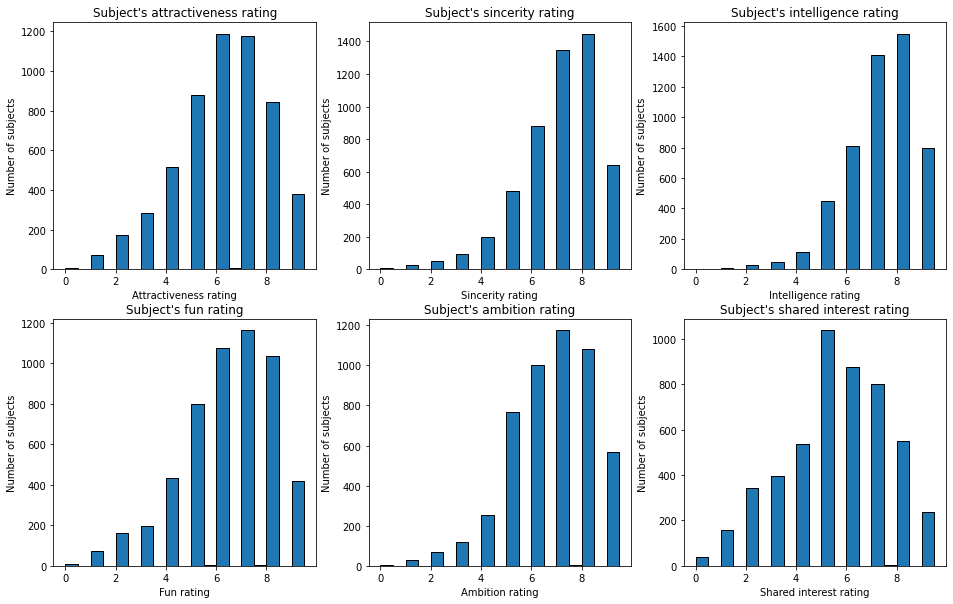

In [ ]:
# passing dictionary to rc parameter
plt.figure(figsize=(16,10))

# for automatically adjusts subplot params
plt.tight_layout(pad=5.0)

# can exist a group of smaller axes within a single figure in the columns 1.
plt.subplot(2,3,1)

# for display the plots to attr_o in training set 
plot_distribution(
    data=df_train['attr_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s attractiveness rating',
    xlabel='Attractiveness rating',
    ylabel='Number of subjects'
)

# can exist a group of smaller axes within a single figure in the columns 2.
plt.subplot(2,3,2)

# for display the plots to sinc_o in training set 
plot_distribution(
    data=df_train['sinc_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s sincerity rating',
    xlabel='Sincerity rating',
    ylabel='Number of subjects'
)
# can exist a group of smaller axes within a single figure in the columns 3.
plt.subplot(2,3,3)

# for display the plots to intel_o in training set 
plot_distribution(
    data=df_train['intel_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s intelligence rating',
    xlabel='Intelligence rating',
    ylabel='Number of subjects'
)
# can exist a group of smaller axes within a single figure in the columns 1.
plt.subplot(2,3,4)
# for display the plots to fun_o in training set 
plot_distribution(
    data=df_train['fun_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s fun rating',
    xlabel='Fun rating',
    ylabel='Number of subjects'
)
# can exist a group of smaller axes within a single figure in the columns 2.
plt.subplot(2,3,5)
# for display the plots to amb_o in training set 
plot_distribution(
    data=df_train['amb_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s ambition rating',
    xlabel='Ambition rating',
    ylabel='Number of subjects'
)
# can exist a group of smaller axes within a single figure in the columns 3.
plt.subplot(2,3,6)
# for display the plots to shar_o in training set 
plot_distribution(
    data=df_train['shar_o'],
    bins=np.arange(0, 10, 0.5).tolist(),
    title='Subject\'s shared interest rating',
    xlabel='Shared interest rating',
    ylabel='Number of subjects'
)

In [ ]:
# convert the datatype of gender from int to object in training and testing data 
df_train.income = df_train.income.astype('float64')
df_test.income = df_test.income.astype('float64')

df_train.income

id
2583        NaN
6830        NaN
4840        NaN
5508    45300.0
4828    46138.0
         ...   
3390    65708.0
4130        NaN
1178    37881.0
5016        NaN
8149        NaN
Name: income, Length: 5909, dtype: float64

In [ ]:
# show all statistics in training data
df_train.describe(include='all')

,gender,condtn,wave,round,position,positin1,order,partner,match,int_corr,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,5909.0,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5909.000000,5800.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,0.167203,0.195257,...,7.241797,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711
std,NaN,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,0.373188,0.304197,...,1.593787,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729
min,NaN,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,0.000000,-0.830000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,NaN,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,0.000000,-0.020000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,NaN,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,0.000000,0.210000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,NaN,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,0.000000,0.430000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [ ]:
# show all statistics in testing data
df_test.describe(include='all')

,gender,condtn,wave,round,position,positin1,order,partner,int_corr,samerace,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,2469.0,2469.000000,2469.000000,2469.000000,2469.000000,1941.000000,2469.000000,2469.000000,2420.000000,2469.000000,...,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,603.000000,603.000000,603.000000,603.000000,603.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.838396,11.359255,16.924261,9.141353,9.392581,8.965978,8.965168,0.197814,0.394492,...,7.236752,8.064103,8.416239,7.693162,7.374359,6.834163,7.575456,7.903814,7.137645,6.945274
std,NaN,0.368162,5.959627,4.284307,5.592006,5.740292,5.525290,5.469045,0.302013,0.488840,...,1.535277,1.632694,1.459546,1.713641,1.972877,1.439486,1.520249,1.387187,1.639208,1.724936
min,NaN,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,-0.830000,0.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,NaN,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,4.000000,-0.010000,0.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,NaN,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,8.000000,0.210000,0.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,NaN,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,13.000000,0.430000,1.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [ ]:
# First, lets show sum of duplicate values (if any)
df_train.duplicated().sum()

0

In [ ]:
# show the count of all the unique values in the training data
df_train.nunique().sort_values(ascending=True)

gender        2
condtn        2
match         2
date_3        2
samerace      2
           ... 
undergra    241
field       259
income      261
from        269
career      367
Length: 188, dtype: int64

In [ ]:
# show the count of all the unique values in the testing data
df_test.nunique().sort_values(ascending=True)

gender        2
condtn        2
date_3        2
samerace      2
met_o         3
           ... 
undergra    235
income      253
field       254
from        265
career      358
Length: 187, dtype: int64

In [ ]:
# anything missing in training data? 
df_train.isnull().sum().sort_values(ascending=False)

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
            ... 
order          0
position       0
round          0
wave           0
gender         0
Length: 188, dtype: int64

In [ ]:
# anything missing in testing data? 
df_test.isnull().sum().sort_values(ascending=False)

num_in_3    2261
numdat_3    2033
expnum      1951
sinc7_2     1904
amb7_2      1904
            ... 
order          0
position       0
round          0
wave           0
gender         0
Length: 187, dtype: int64

## **Split the data**
Split the training and PredefinedSplit is created by splitting the training data to split cross-validator

In [ ]:
# Spliting the traing data to x_train (the Features) and y_train (the Label)
y_train = df_train['match'] # lower case for vector
x_train = df_train.drop('match', axis=1) # upper case for matrix

In [ ]:
# # Split the traing data 80% for training and 20% for validation data
# x_train, x_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, shuffle=True, random_state= 42)

In [ ]:
# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    x_train, y_train, train_size = 0.8, stratify = y_train, random_state = 42)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in x_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

## **A Tunable Pipeline**
As a single tunable pipeline with hyper-parameters, we can combine preprocessing stages and model. Define a pipeline for transformer numeric and categorical feature. 

In [ ]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the df_train.info() output )
features_numeric = list(x_train.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df_train.info() output )
features_categorical = list(x_train.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1

In [ ]:
# Show all Category in training set 
x_train.select_dtypes(include=['category'])

,gender,field,undergra,mn_sat,tuition,from,career
id,,,,,,,
2583,0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",University President
6830,1,Engineering,NaN,NaN,NaN,"Boston, MA",Engineer or iBanker or consultant
4840,1,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",Real Estate Consulting
5508,1,International Affairs,NaN,NaN,NaN,"Washington, DC",public service
4828,1,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,undecided
...,...,...,...,...,...,...,...
3390,0,Clinical Psychology,NaN,NaN,NaN,New York,Psychologist
4130,1,MBA,NaN,NaN,NaN,Colombia,Consulting
1178,0,MA Science Education,University of Washington,"1,155.00","13,258.00",Seattle,Teacher


In [ ]:
# makes the random numbers predictable
np.random.seed(0)

# define a pipeline for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

## **Tuning Methods**

Tuning Methods *(Grid Search, Random Search, Bayisen Search)* are available in the scikit-learn class model_selection. It can be initiated by creating an object.


**Parameters of Tuning Methods *(Grid Search, Random Search, Bayisen Search)* method are:**
* **estimator:** *(object)* a scikit-learn model.
* **param_grid:** *(dict or list of dictionaries)* This enables searching over any sequence of parameter settings.
* **scoring:** *(str, callable, list, tuple or dict)* Strategy to evaluate the performance of the cross-validated model on the test set.
* **n_jobs:** *(int)* Number of jobs to run in parallel. 
  * `None` means 1.
  * `-1` means using all processors.
* **refit:** *(bool, str, or callable)* Refit an estimator using the best found parameters on the whole dataset.
* **cv:** *(int, cross-validation generator or an iterable)* determines the cross-validation splitting strategy. Possible inputs for cv are:

  * None, to use the default 5-fold cross validation.
  * integer, to specify the number of folds in a (Stratified)KFold.
  * CV splitter.
  * An iterable yielding (train, test) splits as arrays of indices.
* **verbose:** *(int)* Controls the verbosity (Controll to show messages)
  * `>1`: the computation time for each fold and parameter candidate is displayed.
  * `>2` : the score is also displayed.
  * `>3` : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
* **error_score:** *(‘raise’ or numeric)* Value to assign to the score if an error occurs in estimator fitting.

### **Grid Search**

Grid search is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. The performance of a model significantly depends on the value of hyperparameters. 

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

I will create function to create object from Grid Search, fit them and get the best score.  

In [ ]:
# Make Function to create and fit the Grid Search to pipeline

def create_fit_grid_search(full_pipeline, param_grid, cv, X_data, Y_data):
  # cv means number of K-fold cross-validation or validation set
  # n_jobs means the cucurrent number of jobs (on colab since we only have two cpu cores, we set it to 2)

  grid_search = GridSearchCV(
      full_pipeline, param_grid, cv=cv, verbose=1, n_jobs=2, 
      scoring='roc_auc') # create object GridSearchCV

  grid_search.fit(X_data, Y_data) # train the gridsearch

  print('best score {}'.format(grid_search.best_score_))
  print('best score {}'.format(grid_search.best_params_))
  return grid_search

### **Random Search**

Random search methods are stochastic approaches that rely entirely on the random sampling of a succession of points in the problem's feasible region, according to a predetermined probability distribution or sequence of probability distributions.


I will create function to create object from Random Search, fit them and get the best score.  

In [ ]:
# Make Function to create and fit the Random Search to pipeline

def create_fit_random_search(full_pipeline, param_random, cv, X_data, Y_data):
  # cv= cv means cv-fold cross-validation or validation set
  # n_jobs means the cucurrent number of jobs
  # (on colab since we only have two cpu cores, we set it to 2)
  random_search = RandomizedSearchCV(
      full_pipeline, param_random, cv=cv, verbose=1, n_jobs=2, 
      # number of random trials
      n_iter=10,
      scoring='roc_auc')

  random_search.fit(X_data, Y_data)

  print('best score {}'.format(random_search.best_score_))
  print('best score {}'.format(random_search.best_params_))
  return random_search

### **Bayesian Search**

This model is called a **surrogate** for the objective function. The surrogate is much easier to optimize than the objective function and Bayesian methods work by finding the next set of hyperparameters to evaluate on the actual objective function by selecting hyperparameters that perform best on the surrogate function.

Bayesian Search keeps track of previous assessment results, which they use to create a probabilistic model that maps hyperparameters to the likelihood of a score on the objective function.

\
This method advocates the usage of intelligence to pick the next set of hyperparameters which will improve the model performance. We iteratively repeat this process until we converge to an optimum.



I will create function to create object from Bayesian Search, fit them and get the best score.  

In [ ]:
# Make Function to create and fit the Bayesian Search to pipeline

def create_fit_bayesian_search(full_pipeline, param_bayesian, cv, X_data, Y_data):
  # cv= cv means cv-fold cross-validation or validation set
  # n_jobs means the cucurrent number of jobs
  # (on colab since we only have two cpu cores, we set it to 2)
  Bayes_search = BayesSearchCV(
      full_pipeline, param_bayesian, cv=cv, verbose=1, n_jobs=2, 
      # number of Bayes trials
      n_iter=10,
      scoring='roc_auc')

  Bayes_search.fit(X_data, Y_data)

  print('best score {}'.format(Bayes_search.best_score_))
  print('best score {}'.format(Bayes_search.best_params_))
  return Bayes_search

## **Different trials on model tuning**

###  **4* XGBoost**

\

This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

A Gradient Boosting Decision Trees (GBDT) is a decision tree ensemble learning algorithm similar to random forest, **Ensemble learning algorithms** combine multiple machine learning algorithms to obtain a better model. **Random forest** uses to build full decision trees in parallel from random bootstrap samples of the data set. 

It is the top machine learning library for regression, classification, and ranking tasks.

* It includes parallel tree boosting.
* It supports regularization.
* It is designed to handle missing data with its in-build features.
* The user can run a cross-validation after each iteration. 
* It works well in small to medium dataset.
* It is designed to be highly efficient, flexible and portable.
* It has a distributed weighted quantile sketch algorithm to effectively handle weighted data.

To develop a model, the XGBoost classifier contains a lot of hyperparameters. I'll use some of them to assist us enhance the model and score.

**The hyperparameters are:**
* **learning_rate:** Learning rate reduces each tree's contribution by learning rate. Between learning rate and n estimators, there is a trade-off.
* **n_estimators:** The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
* **subsample:** The percentage of samples that will be used to fit particular base learners. Stochastic Gradient Boosting occurs when the value is less than 1.0. The parameter n estimators interacts with subsample. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
* **colsample_bytree:** Subsample ratio of columns when constructing each tree.
*  **nthread:** Number of threads to use for loading data when parallelization is applicable. If -1, uses maximum threads available on the system.
* **objective:** Specify the learning task and the corresponding learning objective or a custom objective function to be used.
* **silent:** Whether print messages during construction.
* **random_state:** Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split (see Notes for more details). It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls.


In [ ]:
# for the create pipeline with my classifier is XGBoost Classifier
full_pipeline_XGB = create_fit_pipeline(XGBClassifier(objective='binary:logistic', silent=True, random_state= 42))
# prediction the pipeline
predict_pipeline(full_pipeline_XGB)

0    2253
1     216
dtype: int64

#### **1- Grid Search with Validation Set**

**using Grid Search and XGBoost Classifier with Validation Set**

**Expectations:**

I will use the Grid Search and XGBoost with Validation Set. I expect that it will give me the highest score, because the model try all possible values to know the optimal values, and fit the estimator (model) on your training set.

I'm going to specify some hyperparameters for the preprocessor, select features, and XGBoost classifier.

\

**observations:**

The best hyperparameters for this model will be:
* ***objective:** binary:logistic
* **silent:** True
* **random_state:** 42
* **strategy:** mean
* **K:** 41
* ***learning_rate:** 0.03
* **n_estimators:** 1500
* **subsample:** 0.9
* **colsample_bytree:** 0.8
<!-- * **nthread:** --------------------- -->

\


Scores:

     In colab ==> Score: 0.905785

     In Kaggle 
        * Public score: 0.88052
        * Private score: 0.87822




\

**plan:**

I will use Random Search and XGBoost Classifier with Validation Set.


In [ ]:
# hyperparameter for XGBoost Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid_XGB = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'selector__k': [41, 50, 60], # for select features
     'my_classifier__learning_rate' : [0.01, 0.02, 0.03, 0.1],
    'my_classifier__n_estimators' : [1500, 2000, 3000],
    # 'my_classifier__min_child_weight': [1, 5, 10],
#     'my_classifier__gamma': [0.5, 1, 1.5],
    'my_classifier__subsample': [0.6, 0.8, 0.9],
    'my_classifier__colsample_bytree': [0.6, 0.7, 0.8],
    # 'my_classifier__max_depth': np.arange(1, 20,2)
}

In [ ]:
# using the create_fit_grid_search function and it will return grid_search for XGBoost and it will use the (x_train) and (y_train)
grid_search_XGB = create_fit_grid_search(full_pipeline_XGB, param_grid_XGB, pds, x_train, y_train)

Fitting 1 folds for each of 324 candidates, totalling 324 fits
best score 0.9057854972489119
best score {'my_classifier__colsample_bytree': 0.8, 'my_classifier__learning_rate': 0.03, 'my_classifier__n_estimators': 1500, 'my_classifier__subsample': 0.9, 'preprocessor__num__imputer__strategy': 'mean', 'selector__k': 41}


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(grid_search_XGB, 'XGB_grid_Validation')

#### **2- Random Search with Validation Set**

**using Random Search and XGBoost Classifier with Validation Set**

**Expectations:**

Random Search and XGBoost with Validation Set will be used. Because Random search works best for lower dimensional data and fits the estimator (model) on your training set, I expect it to give me the greatest score.

I'm going to specify some hyperparameters for the preprocessor, select features, and XGBoost classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **objective:** binary:logistic
* **silent:** True
* **random_state:** 42
* **strategy:** mean

* **K:** 43
* **learning_rate:** 0.02
* **n_estimators:** 850
* **subsample:** 0.6
* **gamma:** 1
* **nthread:** 5

\
Scores:

     In colab ==> Score: 0.88398

     In Kaggle 
        * Public score:  0.87908
        * Private score: 0.87673


\

**plan:**

I will use Bayesian Search and XGBoost Classifier with Cross Validation.

In [ ]:
# hyperparameter for XGBoost Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_XGB = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'selector__k': [20, 30, 35, 40, 41, 42, 43, 55], 
#     'my_classifier__random_state' : [0, 1, 42, 15],
    'my_classifier__learning_rate' : [0.01,0.02, 0.05, 0.1],
    'my_classifier__n_estimators' : [400, 600, 700, 800, 850],
    'my_classifier__nthread' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
#     'my_classifier__min_child_weight': [1, 5, 10],
    'my_classifier__gamma': [0.4, 0.5, 0.6, 1, 1.5, 2, 2.5, 3, 5],
    'my_classifier__subsample': [0.6, 0.8, 0.9, 1.0],
#     'my_classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'my_classifier__max_depth': np.arange(3, 20, 2)
}

In [ ]:
# using the create_fit_Random_search function and it will return Random_search for XGBoost and it will use the (x_train) and (y_train)
random_search_XGB = create_fit_random_search(full_pipeline_XGB, param_XGB, 20, x_train, y_train)
print("Best: %f using %s" % (random_search_XGB.best_score_, random_search_XGB.best_params_))

Fitting 20 folds for each of 10 candidates, totalling 200 fits
best score 0.8839801366186842
best score {'selector__k': 42, 'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__subsample': 0.9, 'my_classifier__nthread': 1, 'my_classifier__n_estimators': 700, 'my_classifier__learning_rate': 0.05, 'my_classifier__gamma': 1}
Best: 0.883980 using {'selector__k': 42, 'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__subsample': 0.9, 'my_classifier__nthread': 1, 'my_classifier__n_estimators': 700, 'my_classifier__learning_rate': 0.05, 'my_classifier__gamma': 1}


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(random_search_XGB, 'XGB_Random_Validation')

#### **3- Bayesian Search with Cross Validation**

**using Bayesian Search and XGBoost Classifier with Cross Validation**

**Expectations:**

I'll utilise Cross Validation with Bayesian Search and XGBoost. Because Bayesian Search discovers the extrema of objective functions that are expensive to evaluate and fits the estimator (model) on your training set, I expect it to give me the greatest score.

I'm going to specify some hyperparameters for the preprocessor, select features, and XGBoost classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **objective:** binary:logistic
* **silent:** True
* **random_state:** 42
* **strategy:** mean
* **K:** 120
* **learning_rate:** 0.01
* **n_estimators:** 3000
* **subsample:** 0.8
* **colsample_bytree:** 0.8
* **nthread:** 6
* **CV:** 20

\


Scores:

     In colab ==> Score: 0.888194

     In Kaggle 
        * Public score: 0.88872
        * Private score: 0.89038




\

**plan:**

I will use Bayesian Search and XGBoost Classifier with Validation Set.


In [ ]:
# hyperparameter for XGBoost Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_XGB = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'selector__k': [40, 41, 42, 43, 55, 70, 90, 100, 120, 130], 
    'my_classifier__learning_rate' : [0.005, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3],
    'my_classifier__n_estimators' : [600,1000, 1100, 1500, 2000, 3000, 4000],
    'my_classifier__nthread' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
#     'my_classifier__min_child_weight': [1, 5, 10],
#     'my_classifier__gamma': [0.4, 0.5, 0.6, 1, 1.5, 2, 2.5, 3, 5],
    'my_classifier__subsample': [0.05, 0.2, 0.3, 0.6, 0.8, 0.9],
    'my_classifier__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'my_classifier__max_depth': np.arange(3, 20),
#     'my_classifier__random_state' : [0, 1, 42, 15]
}

In [ ]:
# using the create_fit_bayesian_search function and it will return bayesian_search for XGBoost and it will use the (x_train) and (y_train)
grid_search_XGB = create_fit_bayesian_search(full_pipeline_XGB, param_grid_XGB, 20, x_train, y_train)
print("Best: %f using %s" % (grid_search_XGB.best_score_, grid_search_XGB.best_params_))

Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
[23:48:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if yo

In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(grid_search_XGB, 'XGB_Bayesian_Cross')

#### **4- Bayesian Search with Validation Set**

**using Bayesian Search and XGBoost Classifier with Validation Set**

**Expectations:**

I'll utilise Validation Set with Bayesian Search and XGBoost. Because Bayesian Search discovers the extrema of objective functions that are expensive to evaluate and fits the estimator (model) on your training set, I expect it to give me the greatest score.

I'm going to specify some hyperparameters for the preprocessor, select features, and XGBoost classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **objective:** binary:logistic
* **silent:** True
* **random_state:** 42
* **strategy:** mean
* **K:** 41
* **learning_rate:** 0.01
* **n_estimators:** 3000
* **subsample:** 0.8
* **colsample_bytree:** 0.7
* **CV:** 60

\


Scores:

     In colab ==> Score: 0.90328

     In Kaggle 
        * Public score:  0.88325
        * Private score: 0.88308




\

**plan:**

I will use Random Search and Logistic Regression Classifier with Cross Validation.


In [ ]:
# using the create_fit_bayesian_search function and it will return bayesian_search for XGBoost and it will use the (x_train) and (y_train)
grid_search_XGB = create_fit_bayesian_search(full_pipeline_XGB, param_grid_XGB, pds, x_train, y_train)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.9032807752319947
best score OrderedDict([('my_classifier__colsample_bytree', 0.7), ('my_classifier__learning_rate', 0.02), ('my_classifier__n_estimators', 3000), ('my_classifier__subsample', 0.6), ('preprocessor__num__imputer__strategy', 'mean'), ('selector__k', 41)])


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(grid_search_XGB, 'XGB_Bayesian_Validation')

### **2* Logistic Regression**

Logistic regression is used to handle the classification problems.

It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation.  

It is often used for predictive analytics and modeling, and extends to applications in machine learning. Logistic regression is easier to implement, interpret, and very efficient to train. 

\

**There are three main types of logistic regression:**
 * **Binary regression** deals with two possible values, essentially: yes or no. 
 * **Multinomial logistic regression** deals with three or more values.
 * **ordinal logistic regression** deals with three or more classes in a predetermined order. 

To develop a model, the Logistic Regression classifier contains a lot of hyperparameters. I'll use some of them to assist us enhance the model and score.

**The hyperparameters are:**
* **penalty:** Used to specify the norm used in the penalization. The newton-cg and lbfgs solvers support only l2 penalties.
   * `'none':` no penalty is added;
   * `'l2':` add a L2 penalty term and it is the default choice;
   * `'l1':` add a L1 penalty term;
   * `'elasticnet':` both L1 and L2 penalty terms are added.

* **C:** Inverse of regularization strength.
* **solver:** *(‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’)* use in the optimization problem. Default is ‘lbfgs’.
  * `For small datasets, ‘liblinear’` is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
  * `For multiclass problems,` only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
  * `‘liblinear’` is limited to one-versus-rest schemes.
* **random_state:** Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data. 

In [ ]:
# for the create pipeline with my classifier is Logistic Regression Classifier
full_pipeline_Log = create_fit_pipeline(LogisticRegression(random_state = 42))

In [ ]:
# hyperparameter for Logistic Regression Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_Log = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'selector__k': [40, 41, 42, 43, 55, 70, 90, 100, 120, 130],
#     'my_classifier__random_state' : [0, 1, 42, 15, 2],
    'my_classifier__penalty' : ['l1', 'l2', 'elasticnet'],
    'my_classifier__C' : [0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1],
    'my_classifier__solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
}

#### **1- Random Search With Cross Validation**

**using Random Search and Logistic Regression Classifier with Cross Validation**

**Expectations:**

Random Search and Logistic Regression with Cross Validation will be used. Because Random search works best for lower dimensional data and fits the estimator (model) on your training set, I expect it to give me the greatest score.

I'm going to specify some hyperparameters for the preprocessor, select features, and Logistic Regression classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **random_state:** 42
* **strategy:** mean

* **K:** 120
* **penalty:** l2
* **C:** 0.04
* **solver:** lbfgs


\
Scores:

     In colab ==> Score: 0.8590

     In Kaggle 
        * Public score: 0.86515
        * Private score: 0.85417


\

**plan:**

I will use Bayesian Search and Logistic Regressio Classifier with Cross Validation.

In [ ]:
# using the create_fit_grid_search function and it will return grid_search for Logistic Regression and it will use the (x_train) and (y_train)
random_search_Log = create_fit_random_search(full_pipeline_Log, param_Log, 20, x_train, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits
best score 0.8590295841453003
best score {'selector__k': 120, 'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__solver': 'lbfgs', 'my_classifier__penalty': 'l2', 'my_classifier__C': 0.04}


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(random_search_Log, 'Log_Random_Cross')

#### **2- Bayesian Search With Cross Validation**

**using Bayesian Search and Logistic Regression Classifier with Cross Validation**

**Expectations:**

Bayesian Search and Logistic Regression with Cross Validation will be used. Because Bayesian Search discovers the extrema of objective functions that are expensive to evaluate and fits the estimator (model) on your training set, I expect it to give me the greatest score.

I'm going to specify some hyperparameters for the preprocessor, select features, and Logistic Regression classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **random_state:** 42
* **strategy:** mean

* **K:** 55
* **penalty:** none
* **C:** 0.02
* **solver:** sag


\
Scores:

     In colab ==> Score: 0.85860

     In Kaggle 
        * Public score: 0.86203
        * Private score: 0.84995


\

**plan:**

I will use Grid Search and SVM Classifier with Cross Validation.

In [ ]:
# hyperparameter for Logistic Regression Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_Log = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'selector__k': [40, 41, 42, 43, 55, 70, 90, 100, 120, 130],
#     'my_classifier__random_state' : [0, 1, 42, 15, 2],
    'my_classifier__penalty' : ['l2', 'none'],
    'my_classifier__C' : [0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 1],
    'my_classifier__solver' : ['newton-cg', 'sag', 'saga', 'lbfgs']
}

In [ ]:
# using the create_fit_grid_search function and it will return grid_search for Logistic Regression and it will use the (x_train) and (y_train)
bayesian_search_Log = create_fit_bayesian_search(full_pipeline_Log, param_Log, 20, x_train, y_train)

Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
best score 0.8586056091045087
best score OrderedDict([('my_classifier__C', 0.02), ('my_classifier__penalty', 'none'), ('my_classifier__solver', 'sag'), ('preprocessor__num__imputer__strategy', 'mean'), ('selector__k', 55)])


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(bayesian_search_Log, 'Log_Bayesian_Cross')

### **2* SVM**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

It uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

\
It is higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

To develop a model, the SVM classifier contains a lot of hyperparameters. I'll use some of them to assist us enhance the model and score.

**The hyperparameters are:**
* **C:** Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
* **kernel:** *(‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’)* Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices.
* **gamma:** *(‘scale’, ‘auto’)* 
 * if `gamma='scale'` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
 * if `‘auto’`, uses 1 / n_features.

In [ ]:
# for the create pipeline with my classifier is SVM Classifier
full_pipeline_SVM = create_fit_pipeline(SVC(probability= True, random_state = 42))

In [ ]:
# hyperparameter for SVM Classifier
# here we specify the search space 
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_SVM = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'selector__k': [20, 30, 35, 60,  100, 130],
    'my_classifier__C': [0.1, 0.01, 1],
    'my_classifier__gamma': ["auto", "scale"],
    'my_classifier__kernel': ['rbf']
}


#### **1- Grid Search With Cross Validation**

**using Grid Search and SVM Classifier with Cross Validation**

**Expectations:**

Grid Search and SVM with Cross Validation will be used. I expect that it will give me the highest score, because the model try all possible values to know the optimal values, and fit the estimator (model) on your training set.

I'm going to specify some hyperparameters for the preprocessor, select features, and XGBoost classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **random_state:** 42
* **strategy:** mean

* **K:** 100
* **C:** 0.01
* **gamma:** scale
* **kernel:** rbf

\
Scores:

     In colab ==> Score: 0.85665

     In Kaggle 
        * Public score: 0.86524
        * Private score: 0.86463


\

**plan:**

I will use Bayesian Search and SVM Classifier with Validation Set.

In [ ]:
# using the create_fit_grid_search function and it will return grid_search for SVM and it will use the (x_train) and (y_train)
grid_search_SVM = create_fit_bayesian_search(full_pipeline_SVM, param_SVM, 20, x_train, y_train)

Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Fitting 20 folds for each of 1 candidates, totalling 20 fits
best score 0.8566532446097824
best score OrderedDict([('my_classifier__C', 0.01), ('my_classifier__gamma', 'scale'), ('my_classifier__kernel', 'rbf'), ('preprocessor__num__imputer__strategy', 'mean'), ('selector__k', 100)])


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(grid_search_SVM, 'SVM_Grid_Cross')

#### **2- Bayesian Search With Validation Set**

**using Bayesian Search and SVM Classifier with Validation Set**

**Expectations:**

Bayesian Search and SVM with Validation Set will be used. Because Bayesian Search discovers the extrema of objective functions that are expensive to evaluate and fits the estimator (model) on your training set, I expect it to give me the greatest score.

I'm going to specify some hyperparameters for the preprocessor, select features, and XGBoost classifier.

\

**observations:**

The best hyperparameters for this model will be:
* **random_state:** 42
* **strategy:** mean

* **K:** 130
* **C:** 0.1
* **gamma:** scale
* **kernel:** rbf

\
Scores:

     In colab ==> Score: 0.87478

     In Kaggle 
        * Public score: 0.85677
        * Private score: 0.86006



In [ ]:
# using the create_fit_bayesian_search function and it will return bayesian_search for SVM and it will use the (x_train) and (y_train)
bayesian_search_SVM = create_fit_bayesian_search(full_pipeline_SVM, param_SVM, pds, x_train, y_train)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8747895622895623
best score OrderedDict([('my_classifier__C', 0.1), ('my_classifier__gamma', 'scale'), ('my_classifier__kernel', 'rbf'), ('preprocessor__num__imputer__strategy', 'mean'), ('selector__k', 130)])


In [ ]:
# using the predict_save_csv function and it will predict the testing data and save it in the csv file
predict_save_csv(bayesian_search_SVM, 'SVM_Bayesian_Validation')

# Reference

https://www.nvidia.com/en-us/glossary/data-science/xgboost/#:~:text=XGBoost%2C%20which%20stands%20for%20Extreme,%2C%20classification%2C%20and%20ranking%20problems.



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f


https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f